In [173]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Import the JY_Toolkit that complete by my hands
import os,sys
parentdir = os.path.dirname(os.path.abspath('.'))
temp_path = os.path.join(parentdir,'JY_Toolkit')
sys.path.insert(0,temp_path)
import JY_Toolkit



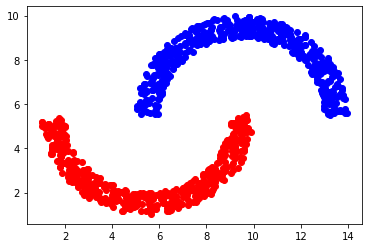

In [174]:
JY_Toolkit.Jy_makeDataset.random_state(5228)

X,y = JY_Toolkit.Jy_makeDataset.draw_HalfMoon(n_sample=1000,ver_distance=0,slope=0)

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
# X
p_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == 1]
p_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == 1]
n_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == -1]
n_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == -1]

plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()

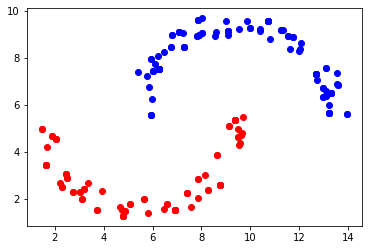

In [175]:
X_train,X_valid,y_train,y_valid = JY_Toolkit.Jy_dataSetProcess.Jy_train_test_split(X,y)

p_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == 1]
p_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == 1]
n_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == -1]
n_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == -1]

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()


In [176]:

temp = np.ones(len(X))
new_X_train = np.column_stack((X, temp))  # up X dimension
R_xx = np.dot(new_X_train.T,new_X_train)

Regular = np.eye(R_xx.shape[0])
print(Regular)
R_xx += Regular * 67

R_xx_inv = np.linalg.inv(R_xx)
res_w = np.dot(-1 * R_xx_inv,-1 * np.dot(new_X_train.T,y))
res_w


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([ 0.00359929,  0.25159561, -1.33489074])

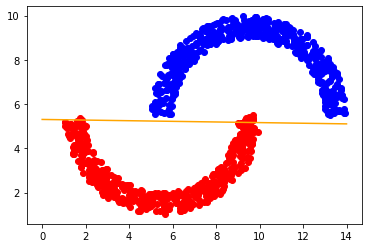

In [177]:
p_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == 1]
p_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == 1]
n_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == -1]
n_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == -1]

line_x = np.linspace(0,14,100)

line_k = -1*(res_w[0]/res_w[1])
line_b = -1*(float(res_w[2])/res_w[1])

# line_y = list(map(lambda x : x*line_k + line_b ,line_x))
# y = line_k * line_x + line_b
line_y = line_k * line_x + line_b
fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')

plot_1.plot(line_x,line_y,c = 'orange')

plt.show()


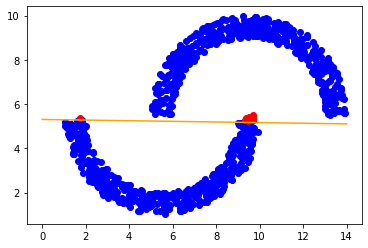

0.99


In [178]:
pre = np.dot(new_X_train,res_w) 

p_point_x1 = [ X[i,0] for i in range(len(X)) if pre[i]*y[i] >= 0]
p_point_x2 = [ X[i,1] for i in range(len(X)) if pre[i]*y[i] >= 0]
n_point_x1 = [ X[i,0] for i in range(len(X)) if pre[i]*y[i]  < 0]
n_point_x2 = [ X[i,1] for i in range(len(X)) if pre[i]*y[i]  < 0]

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plot_1.plot(line_x,line_y,c = 'orange')
plt.show()
print(len(p_point_x1)/len(X))

删除

In [179]:
'''
# 增广 X
add = np.ones(len(X))
X = np.column_stack((X, add))  # up X dimension
Rx = np.dot(X.T,X)
# 正则项
Regular = np.eye(3)
Rx += Regular * Lambda
# 求逆
Rx_inv = np.linalg.inv(Rx)
# 套公式算 w_map
w_map = np.dot(-1 * Rx_inv,-1 * np.dot(X.T,y))
w_map
'''

'\n# 增广 X\nadd = np.ones(len(X))\nX = np.column_stack((X, add))  # up X dimension\nRx = np.dot(X.T,X)\n# 正则项\nRegular = np.eye(3)\nRx += Regular * Lambda\n# 求逆\nRx_inv = np.linalg.inv(Rx)\n# 套公式算 w_map\nw_map = np.dot(-1 * Rx_inv,-1 * np.dot(X.T,y))\nw_map\n'